In [47]:
#Kemal Sarper Yücel, Oğuzhan Özdemir, Mert Atabey Dinçer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime



import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline
from os.path import join
d_path = "/Users/Sarper/anaconda/"
filename = "cs210-data.csv"

df = pd.read_csv(join(d_path, filename))

In [48]:
df.head(2000)

,LOCATION,Country,Time,GDP(million USD),Average Hours per Person Employed
0,AUS,Australia,2002,5.993012e+05,1794.222390
1,AUS,Australia,2003,6.350851e+05,1798.221134
2,AUS,Australia,2004,6.754519e+05,1801.229444
3,AUS,Australia,2005,7.177051e+05,1801.682150
4,AUS,Australia,2006,7.743274e+05,1801.227169
5,AUS,Australia,2007,8.250407e+05,1796.783511
6,AUS,Australia,2008,8.519831e+05,1753.556658
7,AUS,Australia,2009,9.026705e+05,1779.140951
8,AUS,Australia,2010,9.432284e+05,1755.149464
9,AUS,Australia,2011,9.923274e+05,1771.464784


In [49]:
df.describe()

,Time,GDP(million USD),Average Hours per Person Employed
count,699.000000,6.990000e+02,699.000000
mean,2009.828326,3.541880e+06,1726.054767
std,4.810953,8.580778e+06,207.702934
min,2002.000000,9.351405e+03,1360.365041
25%,2006.000000,2.023781e+05,1570.190339
50%,2010.000000,4.445487e+05,1719.000000
75%,2014.000000,1.974635e+06,1816.778470
max,2018.000000,5.732644e+07,2441.373781


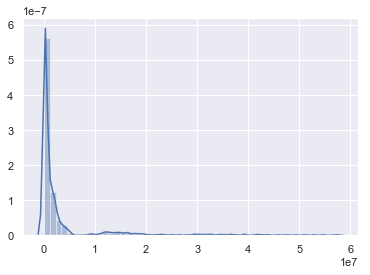

In [50]:
sns.distplot(df["GDP(million USD)"].values, norm_hist=True)  
plt.show()

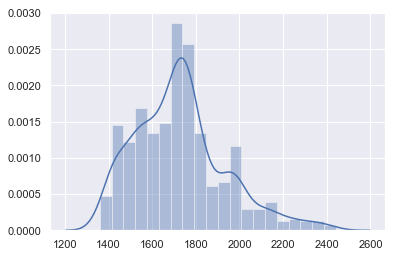

In [51]:
sns.distplot(df["Average Hours per Person Employed"].values, norm_hist=True)  
plt.show()

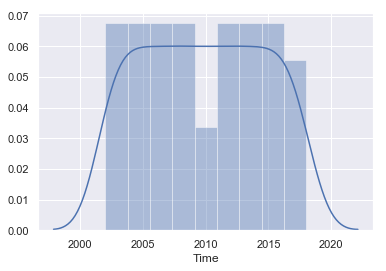

In [52]:
sns.distplot(df["Time"], norm_hist=True)

In [60]:
mgdp = df["GDP(million USD)"].mean()
print(mgdp)

3541879.9640042917


In [61]:
df["Average Hours per Person Employed"].mean()

1726.0547671130198

In [62]:
print("Does GDP affect the average hours worked per person employed?")

Does GDP affect the average hours worked per person employed?


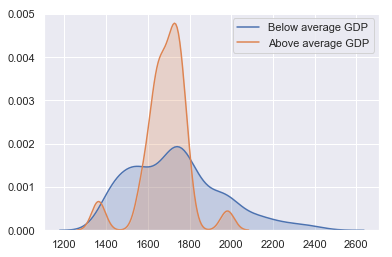

In [66]:
low_gdp = df[df["GDP(million USD)"] < mgdp]["Average Hours per Person Employed"]
high_gdp = df[df["GDP(million USD)"] >= mgdp]["Average Hours per Person Employed"]

ax = sns.kdeplot(low_gdp.rename("Below average GDP"), shade=True)
sns.kdeplot(high_gdp.rename("Above average GDP"), ax=ax, shade=True)

plt.show()

In [67]:
_, p_value = stats.ttest_ind(a=low_gdp, b=high_gdp, equal_var=False)
p_value

0.000835948670449508